In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

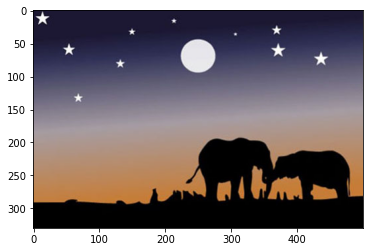

In [5]:
img = cv2.imread('/content/elephant.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

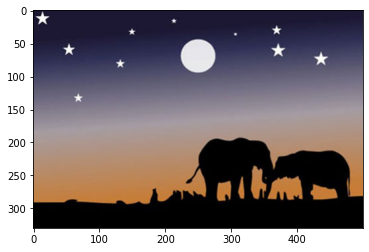

In [6]:
img1 = plt.imread('/content/elephant.jpg')
plt.imshow(img1)
plt.show()

In [7]:
img.shape

(330, 500, 3)

In [0]:
img_flatten = img.reshape(-1, 3)

In [41]:
img_flatten.shape

(165000, 3)

In [10]:
330*500

165000

In [0]:
from sklearn.cluster import KMeans

In [0]:
km = KMeans(n_clusters= 10, n_jobs= -1)

In [66]:
km.fit(img_flatten)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
center = km.cluster_centers_
center

array([[  1.32896995,   0.74069872,   1.09241644],
       [180.20631255, 142.41307416, 115.49133949],
       [ 48.32132964,  47.66320406,  81.54432133],
       [106.12386802, 102.34396409, 124.08937712],
       [233.03863466, 232.72993248, 236.97074269],
       [ 77.77889943,  75.96607211, 103.7942315 ],
       [ 30.74241054,  26.72979374,  53.07720794],
       [191.99266094, 128.68078563,  71.4282519 ],
       [165.89812646, 151.21810218, 152.14281377],
       [134.61374022, 127.79846642, 143.24482999]])

In [68]:
center = np.array(center, dtype= 'uint')
center

array([[  1,   0,   1],
       [180, 142, 115],
       [ 48,  47,  81],
       [106, 102, 124],
       [233, 232, 236],
       [ 77,  75, 103],
       [ 30,  26,  53],
       [191, 128,  71],
       [165, 151, 152],
       [134, 127, 143]], dtype=uint64)

In [0]:
new_img = np.zeros(img_flatten.shape, dtype= 'uint')

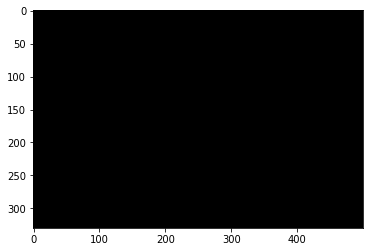

In [70]:
plt.imshow(new_img.reshape(330, 500, 3))
plt.show()

In [71]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [72]:
km.labels_

array([6, 6, 6, ..., 0, 0, 0], dtype=int32)

In [73]:
center[km.labels_[0]] # pixel 1 belonging to which cluster

array([30, 26, 53], dtype=uint64)

In [0]:
for i in range(new_img.shape[0]) :
    new_img[i] = center[km.labels_[i]]

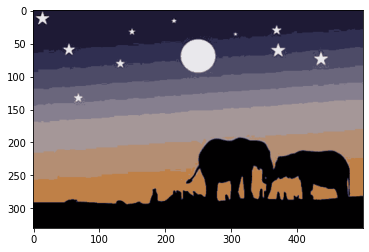

In [75]:
plt.imshow(new_img.reshape(330, 500, 3))
plt.show()